In [75]:
import pandas as pd

In [76]:
import numpy as np

In [77]:
import matplotlib.pyplot as plt

In [78]:
import seaborn as sns

In [79]:
dataset= pd.read_csv('C:/Users/amand/OneDrive/Data Science/ANA500/MSFT.csv')

In [80]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400


In [81]:
dataset.mean()

C:\Users\amand\AppData\Local\Temp\ipykernel_30776\1799472221.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.mean()


Open         4.132494e+01
High         4.176089e+01
Low          4.087849e+01
Close        4.133563e+01
Adj Close    3.625612e+01
Volume       5.875055e+07
dtype: float64

In [82]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9083.000000,9083.000000,9083.000000,9083.000000,9083.000000,9.083000e+03
mean,41.324936,41.760887,40.878488,41.335628,36.256120,5.875055e+07
std,59.696905,60.272218,59.081728,59.714567,59.981436,3.845200e+07
min,0.088542,0.092014,0.088542,0.090278,0.057046,2.304000e+06
25%,4.050781,4.102051,4.027344,4.075195,2.575089,3.461230e+07
50%,26.820000,27.100000,26.520000,26.840000,18.948530,5.203200e+07
75%,40.034999,40.443751,39.500000,39.937500,29.244812,7.265400e+07
max,344.619995,349.670013,342.200012,343.109985,342.402008,1.031789e+09


In [83]:
#exploring the data visually 

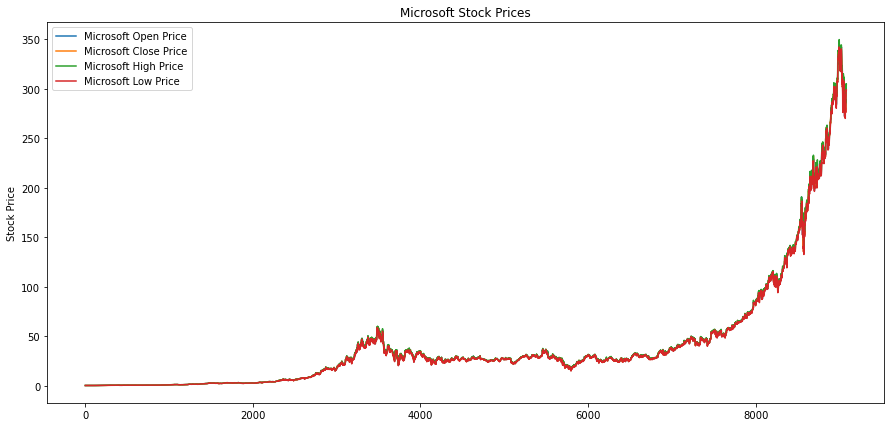

In [84]:
dataset['Open'].plot(label= 'Microsoft Open Price', figsize=(15,7))
dataset['Close'].plot(label= 'Microsoft Close Price')
dataset['High'].plot(label= 'Microsoft High Price')
dataset['Low'].plot(label= 'Microsoft Low Price')
plt.legend()
plt.title('Microsoft Stock Prices')
plt.ylabel('Stock Price')
plt.show()

Text(0.5, 1.0, 'Volume Traded by Microsoft')

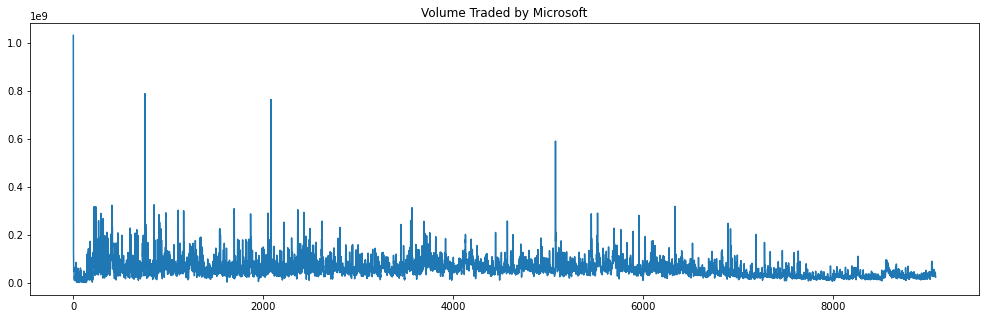

In [85]:
dataset['Volume'].plot(figsize=(17,5))
plt.title('Volume Traded by Microsoft')

In [86]:
#downloaded libraries 

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

In [88]:
%matplotlib inline 

In [89]:
#created the x and Y. 20% of my data set will be testing the rest 80% training 

In [90]:
x= dataset [['High', 'Low','Open', 'Volume']].values 
y= dataset ['Close'].values

In [91]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [92]:
regressor= LinearRegression()

In [93]:
regressor.fit(x_train,y_train)

LinearRegression()

In [94]:
print(regressor.coef_)

[ 8.11157948e-01  7.89165684e-01 -5.99912426e-01 -1.64728820e-10]


In [95]:
print(regressor.intercept_)

-0.0010099184198324451


In [96]:
predicted = regressor.predict(x_test)

In [97]:
print(predicted)

[ 92.82072822  92.46754874  56.58030763 ...  23.2819355   26.31206197
 298.75006043]


In [98]:
dframe= pd.DataFrame({'Actual':y_test.flatten(),'predicted':predicted.flatten()})

In [99]:
dframe.head(25)

,Actual,predicted
0,92.000000,92.820728
1,90.769997,92.467549
2,56.549999,56.580308
3,16.738281,16.682261
4,0.347222,0.336424
5,17.281250,17.207237
6,106.889999,106.468819
7,26.160000,26.078810
8,2.273438,2.260166
9,29.389999,29.283109


In [100]:
import math

In [101]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))
print ('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 0.1830485579357209
Mean Squared Error: 0.16337846884512702
Root Mean Squared Error: 0.4042010252895544


In [102]:
graph=dframe.head(20)

In [103]:
#plotting the predicted vs the actual and the trained is very good is pretty accurate 

<AxesSubplot:>

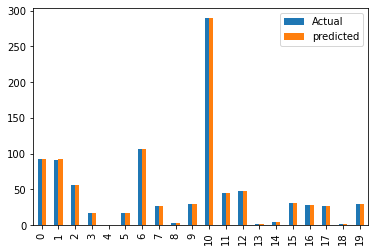

In [104]:
graph.plot(kind='bar')